In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as stats

In [2]:
os.chdir(os.path.join('..','data'))

In [3]:
df = pd.read_csv('brfss.csv')
df = df.dropna()

In [4]:
men = df[df['sex']==1]
women = df[df['sex']==2]
#In order to join Blue Man Group, you have to be male between 177.8 and 185.42 cms

In [5]:
def eval_cdf(value,series):
    count =0
    for x in series:
        if x <= value:
            count += 1
    return count/len(series)

def compute_cdf(series):
    x = sorted(series)
    y = []
    for value in x:
        y.append(eval_cdf(value,x))
    return x,y

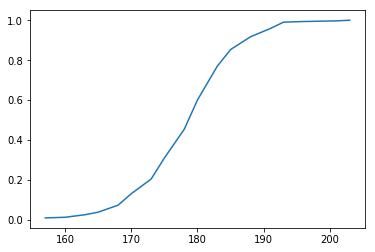

In [6]:
x,y = compute_cdf(men['htm3'])
plt.plot(x,y)

this graph shows it is following a cdf for normal distribution

In [7]:
def z_value(series,value):
    mean = np.mean(series)
    std = np.std(series)
    return (value-mean)/std
z1 = z_value(men['htm3'],177.8)
z2 = z_value(men['htm3'],185.42)
norm.cdf(z2) - norm.cdf(z1)

0.3861167800946494

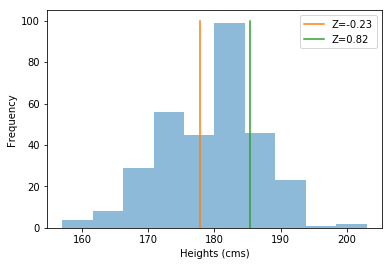

In [8]:
plt.hist(men['htm3'].values,alpha=0.5)
plt.xlabel('Heights (cms)')
plt.ylabel('Frequency')
plt.plot([177.8,177.8],[0,100],label='Z='+str(round(z1,2)))
plt.plot([185.42,185.42],[0,100],label='Z='+str(round(z2,2)))
plt.legend()

Ex 5.2
-------
CDF(x) = 1-(x/xm)^−α


To get a feel for the Pareto distribution, let’s see how different
the world would be if the distribution of human height were Pareto. With the
parameters xm = 1 m and α = 1:7, we get a distribution with a reasonable
minimum, 1 m, and median, 1.5 m

In [9]:
alpha = 1.7
xm = 1

0.6321205588285577

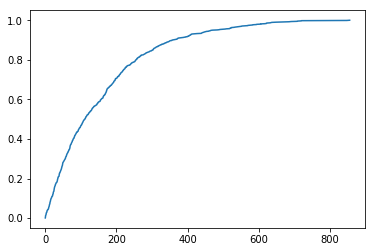

In [10]:
hts = df['htm3'].values
exp = np.random.exponential(scale=np.mean(hts),size=len(hts))
exp,cdf = compute_cdf(exp)
plt.plot(exp,cdf)
np.mean(exp)

# percentage of people less than the mean
stats.expon.cdf(np.mean(hts),scale=np.mean(hts))

If there are 70000 people in Pareto world, how many do we expect to be taller than 1
km? How tall do we expect the tallest person to be?

0.26511041883660047 % taller than 1 km


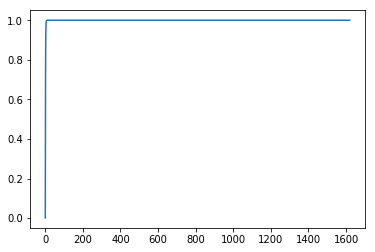

In [20]:
size = 70000
exp_billion = sorted(np.random.exponential(scale=np.mean(hts),size=size))
billion_cdf = stats.expon.cdf(exp_billion)

plt.plot(exp_billion,billion_cdf)
km1_taller = (1-stats.expon.cdf(1000,scale=np.mean(exp_billion)))*100
print(str(km1_taller)+' % taller than 1 km')

ex 5.4
----

In [13]:
baby = pd.read_csv('babyboom.csv')

In [14]:
baby = baby.dropna()
baby.head()

,time,sex,wgt_gms,minutes
0,5.0,1.0,3837.0,5.0
2,104.0,1.0,3334.0,64.0
4,118.0,2.0,3554.0,78.0
6,155.0,2.0,3838.0,115.0
8,257.0,2.0,3625.0,177.0


In [15]:
diff_mins = baby['minutes'].diff() # diff between consecutive values
lam = 1/np.mean(diff_mins)

In [16]:
rand_values = np.random.rand(44)*np.max(diff_mins)
def cdf_exp(sample,lam):
    y = []
    for x in sample:
        y.append(1-np.exp(-lam*x))
    return sorted(y)

y1 = cdf_exp(rand_values,lam)

this above code generates random numbers but not based on expontential distribution

In [17]:
import random
x2= [random.expovariate(lam) for _ in range(len(diff_mins))] 

In [18]:
def eval_cdf(value,series):
    count =0
    for x in series:
        if x <= value:
            count += 1
    return count/len(series)

def compute_cdf(series):
    x = sorted(series)
    y = []
    for value in x:
        y.append(eval_cdf(value,x))
    return x,y

Text(0,0.5,'CDF')

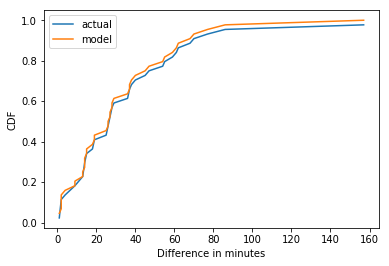

In [19]:
x,y = compute_cdf(diff_mins)
x2,y2 = compute_cdf(x2)
plt.plot(x,y,label='actual')
plt.plot(x,y2,label='model')
plt.legend()
plt.xlabel('Difference in minutes')
plt.ylabel('CDF')

Text(0,0.5,'CCDF')

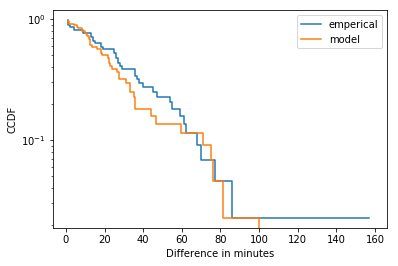

In [20]:
# plot the complementary plot in log-scale
def ccdf(cdf):
    return [1-x for x in cdf]

ccdf_actual = ccdf(y)
ccdf_model = ccdf(y2)

plt.step(x,ccdf_actual,label='emperical')
plt.step(x2,ccdf_model,label='model')
plt.yscale('log')
plt.legend()
plt.xlabel('Difference in minutes')
plt.ylabel('CCDF')

Here the graph shows that CCDF for actual and model plotted in log yscale. The graph is showing straight line for the mode as expeced. But for the data given it follows a straight line upto values 90 (approx) and then deviates from the straight line slope. 
we can conclude that the given data is not perfect to be modelled using exponential distribution.

If you plot distributions for a large number of samples, you get a sense
of how much random variation to expect.

Text(0,0.5,'CCDF')

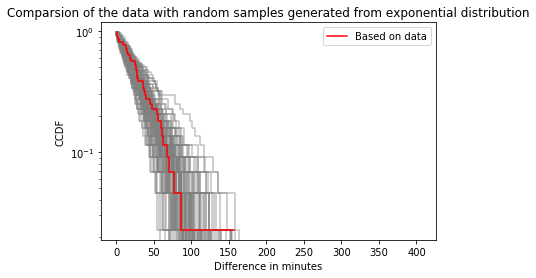

In [21]:
for _ in range(100):
    x1 = [random.expovariate(lam) for _ in range(len(diff_mins))]
    x1,y1 = compute_cdf(x1)
    ccdf_model = ccdf(y1)
    plt.step(x1,ccdf_model,color='grey',alpha=0.5)
plt.yscale('log')
plt.step(x,ccdf_actual,label='Based on data',color='red')
plt.legend()
plt.title('Comparsion of the data with random samples generated from exponential distribution')
plt.xlabel('Difference in minutes')
plt.ylabel('CCDF')

In this case, the data fall within the range we expect, so there is no compelling reason to think it is not exponential.

Ex 5.6
----

The distributions of wealth and income are sometimes modeled
using lognormal and Pareto distributions. To see which is better, let’s look
at some data

To see which is better, let’s look
at some data.
The Current Population Survey (CPS) is a joint effort of the Bureau of Labor
Statistics and the Census Bureau to study income and related variables.

Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm.

In [23]:
df2 = pd.read_csv('hinc.csv').dropna()
df2.head()
df2 = df2.drop(index=41)
df2.tail()

,Unnamed: 0,income,freq,cumsum,ps
36,36,184999.0,502,115824,0.945826
37,37,189999.0,364,116188,0.948799
38,38,194999.0,432,116620,0.952327
39,39,199999.0,378,116998,0.955413
40,40,249999.0,2549,119547,0.976229


Text(0,0.5,'CDF')

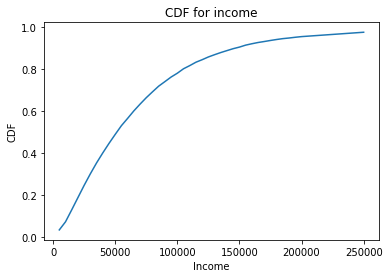

In [35]:
df2 = df2.sort_values('income',ascending=True)
income = df2['income'].values
cdf = df2['ps'].values
plt.plot(income,cdf)
plt.title('CDF for income')
plt.xlabel('Income')
plt.ylabel('CDF')

In [36]:
# now check with pareto and lognormal
np.random.pareto(2.5,size=10)

array([0.36880773, 0.97008714, 0.03142503, 0.27060915, 0.29362675,
       0.09705234, 0.00424136, 0.04316296, 0.2694529 , 0.26681097])

In [28]:
scipy.stats.pareto.cdf([0.99,1.5,10],b=2.5)

array([0.        , 0.63711263, 0.99683772])